In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('supermarket_sales.csv')

In [10]:
df.head()

,invoice_id,branch,city,customer_type,gender_customer,product_line,unit_cost,quantity,5pct_markup,revenue,date,time,payment_method,cogs,gm_pct,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Understanding Dataset

In [11]:
df.shape

(1000, 17)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   invoice_id       1000 non-null   object 
 1   branch           1000 non-null   object 
 2   city             1000 non-null   object 
 3   customer_type    1000 non-null   object 
 4   gender_customer  1000 non-null   object 
 5   product_line     1000 non-null   object 
 6   unit_cost        1000 non-null   float64
 7   quantity         1000 non-null   int64  
 8   5pct_markup      1000 non-null   float64
 9   revenue          1000 non-null   float64
 10  date             1000 non-null   object 
 11  time             1000 non-null   object 
 12  payment_method   1000 non-null   object 
 13  cogs             1000 non-null   float64
 14  gm_pct           1000 non-null   float64
 15  gross_income     1000 non-null   float64
 16  rating           1000 non-null   float64
dtypes: float64(7), 

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
unit_cost,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
5pct_markup,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
revenue,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gm_pct,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross_income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


In [14]:
df.isnull().sum()

invoice_id         0
branch             0
city               0
customer_type      0
gender_customer    0
product_line       0
unit_cost          0
quantity           0
5pct_markup        0
revenue            0
date               0
time               0
payment_method     0
cogs               0
gm_pct             0
gross_income       0
rating             0
dtype: int64

### Checking Duplicates

In [15]:
df.duplicated().sum()

0

### Checking Outliers

In [17]:
def find_outliers_iqr(df):
    outlier_summary = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_summary[column] = {
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Number of Outliers': outliers.shape[0],
            'Outliers Indices': outliers.index.tolist()
        }
    return outlier_summary

# Find outliers in the dataset
outliers_summary = find_outliers_iqr(df)

# Display the summary of outliers for each column
for column, summary in outliers_summary.items():
    print(f"Column: {column}")
    print(f"  Lower Bound: {summary['Lower Bound']}")
    print(f"  Upper Bound: {summary['Upper Bound']}")
    print(f"  Number of Outliers: {summary['Number of Outliers']}")
    print(f"  Outliers Indices: {summary['Outliers Indices']}")
    print()  

Column: unit_cost
  Lower Bound: -34.715
  Upper Bound: 145.525
  Number of Outliers: 0
  Outliers Indices: []

Column: quantity
  Lower Bound: -4.5
  Upper Bound: 15.5
  Number of Outliers: 0
  Outliers Indices: []

Column: 5pct_markup
  Lower Bound: -18.855687500000002
  Upper Bound: 47.2258125
  Number of Outliers: 9
  Outliers Indices: [166, 167, 350, 357, 422, 557, 699, 792, 996]

Column: revenue
  Lower Bound: -395.9694375
  Upper Bound: 991.7420625
  Number of Outliers: 9
  Outliers Indices: [166, 167, 350, 357, 422, 557, 699, 792, 996]

Column: cogs
  Lower Bound: -377.11375000000004
  Upper Bound: 944.5162500000001
  Number of Outliers: 9
  Outliers Indices: [166, 167, 350, 357, 422, 557, 699, 792, 996]

Column: gm_pct
  Lower Bound: 4.761904762
  Upper Bound: 4.761904762
  Number of Outliers: 0
  Outliers Indices: []

Column: gross_income
  Lower Bound: -18.855687500000002
  Upper Bound: 47.2258125
  Number of Outliers: 9
  Outliers Indices: [166, 167, 350, 357, 422, 557, 699

#### Column: 5pct_markup, revenue, cogs, gross_income has outliers

<AxesSubplot:xlabel='5pct_markup', ylabel='Count'>

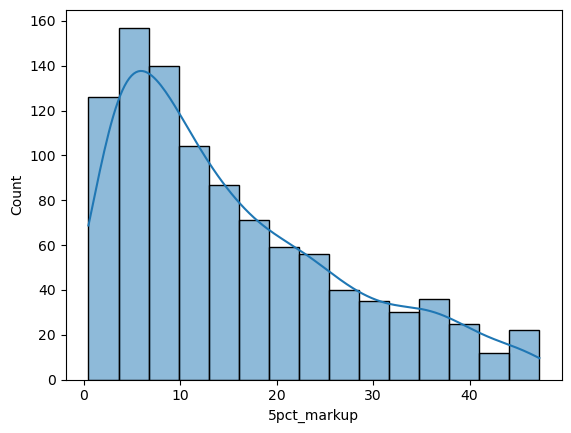

In [23]:
sns.histplot(df['5pct_markup'],kde = True)

<AxesSubplot:xlabel='revenue', ylabel='Count'>

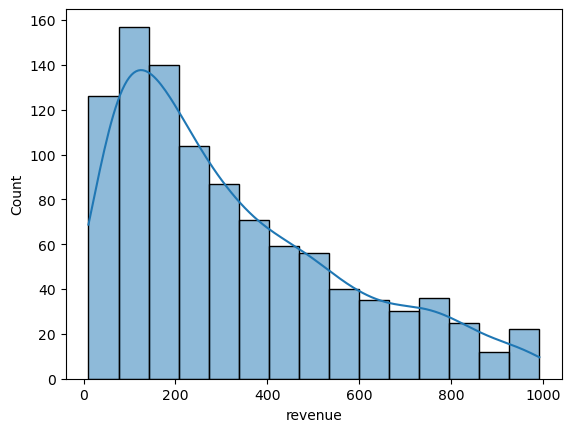

In [24]:
sns.histplot(df['revenue'],kde = True)

<AxesSubplot:xlabel='cogs', ylabel='Count'>

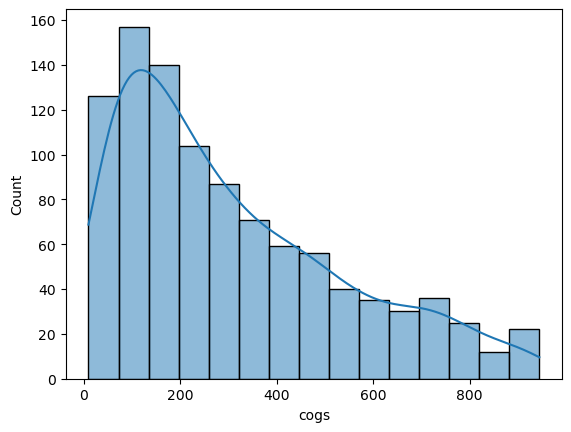

In [25]:
sns.histplot(df['cogs'],kde = True)

<AxesSubplot:xlabel='gross_income', ylabel='Count'>

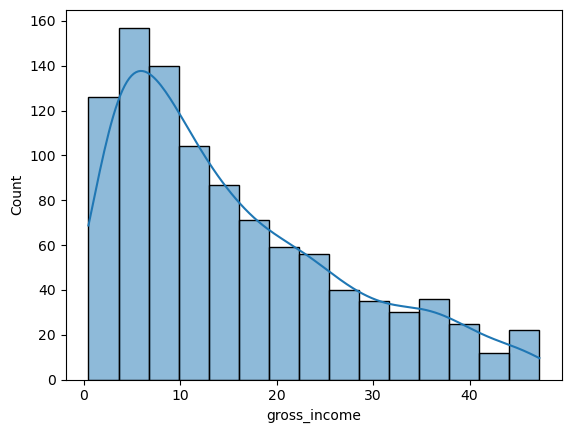

In [26]:
sns.histplot(df['gross_income'],kde = True)

#### Capping

In [21]:
def cap_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    return np.where(column > upper_bound, upper_bound, column)

# Apply capping to multiple columns
columns_to_cap = ['5pct_markup', 'revenue', 'cogs', 'gross_income']
for column in columns_to_cap:
    df[column] = cap_outliers(df[column])

# Display the updated DataFrame
print(df)

      invoice_id branch       city customer_type gender_customer  \
0    750-67-8428      A     Yangon        Member          Female   
1    226-31-3081      C  Naypyitaw        Normal          Female   
2    631-41-3108      A     Yangon        Normal            Male   
3    123-19-1176      A     Yangon        Member            Male   
4    373-73-7910      A     Yangon        Normal            Male   
..           ...    ...        ...           ...             ...   
995  233-67-5758      C  Naypyitaw        Normal            Male   
996  303-96-2227      B   Mandalay        Normal          Female   
997  727-02-1313      A     Yangon        Member            Male   
998  347-56-2442      A     Yangon        Normal            Male   
999  849-09-3807      A     Yangon        Member          Female   

               product_line  unit_cost  quantity  5pct_markup     revenue  \
0         Health and beauty      74.69         7    26.141500  548.971500   
1    Electronic accessories  

### Final checking

In [22]:
def find_outliers_iqr(df):
    outlier_summary = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_summary[column] = {
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Number of Outliers': outliers.shape[0],
            'Outliers Indices': outliers.index.tolist()
        }
    return outlier_summary

# Find outliers in the dataset
outliers_summary = find_outliers_iqr(df)

# Display the summary of outliers for each column
for column, summary in outliers_summary.items():
    print(f"Column: {column}")
    print(f"  Lower Bound: {summary['Lower Bound']}")
    print(f"  Upper Bound: {summary['Upper Bound']}")
    print(f"  Number of Outliers: {summary['Number of Outliers']}")
    print(f"  Outliers Indices: {summary['Outliers Indices']}")
    print()  

Column: unit_cost
  Lower Bound: -34.715
  Upper Bound: 145.525
  Number of Outliers: 0
  Outliers Indices: []

Column: quantity
  Lower Bound: -4.5
  Upper Bound: 15.5
  Number of Outliers: 0
  Outliers Indices: []

Column: 5pct_markup
  Lower Bound: -18.855687500000002
  Upper Bound: 47.2258125
  Number of Outliers: 0
  Outliers Indices: []

Column: revenue
  Lower Bound: -395.9694375
  Upper Bound: 991.7420625
  Number of Outliers: 0
  Outliers Indices: []

Column: cogs
  Lower Bound: -377.11375000000004
  Upper Bound: 944.5162500000001
  Number of Outliers: 0
  Outliers Indices: []

Column: gm_pct
  Lower Bound: 4.761904762
  Upper Bound: 4.761904762
  Number of Outliers: 0
  Outliers Indices: []

Column: gross_income
  Lower Bound: -18.855687500000002
  Upper Bound: 47.2258125
  Number of Outliers: 0
  Outliers Indices: []

Column: rating
  Lower Bound: 1.0
  Upper Bound: 13.0
  Number of Outliers: 0
  Outliers Indices: []

